# Laboratoire d'apprentissage machine 2: Visualisation des données

Ce laboratoire vise à vous familiariser avec des outils de visualisation disponibles avec python. En particulier nous allons voir comment illustrer les données de *dataframes* de la librairie *pandas* afin de vous aider à prendre connaissance de ce que vous manipulez. En effet, avec le volume élevé d'échantillons que l'on peut avoir, il n'est pas réaliste d'essayer de comprendre l'ensemble des données en regardant directement les *dataframes*.

La visualisation est une étape cruciale de l'apprentissage machine. Elle permet de bien sélectionner les méthodes d'apprentissage à privilégier et d'évaluer les performances de ces dernières. Elle permet aussi d'afficher un portrait clair de la situation, ce qui facilite la communication des résultats.

Ce laboratoire est séparé en 4 sections. Les trois premières portent respectivement sur *matplotlib*, les outils graphiques de *pandas* et *seaborn*. Ces sections vous guides et donnent des exemples de comment utiliser les librairies. Suite à ces trois sections d'apprentissage, vous avez une section de questions. Cette section contient des manipulations à effectuer et des questions à répondre. Cette dernière section est évaluée. Les points associés à chaque manipulation ou question sont indiqués dans l'énoncé, pour un total de 15 points + 1 point bonus.

## Modules utilisés

Voici les librairies que nous allons utiliser lors de ce laboratoire:

In [2]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import sklearn.datasets as datasets

## Données utilisées

Deux jeux de données vont être utilisés soit:

* iris: Jeu de données contenant la longueur et la largeur des sépales et des pétales pour différente espèces d'iris
* boston: Jeu de données contenant des données sur le marché de l'immobilier à Boston

Pour plus de'information sur ces jeux de données, consulter [ce lien](https://scikit-learn.org/stable/datasets/toy_dataset.html).

In [3]:
# Import de iris
iris_raw = datasets.load_iris()

data = np.c_[iris_raw['data'], iris_raw['target']]
column_name = iris_raw['feature_names'] + ['target']
iris = pd.DataFrame(data, columns=column_name)

iris['target'] = iris['target'].apply(int)

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# Import de boston
boston_raw = datasets.load_boston()

data = np.c_[boston_raw['data'], boston_raw['target']]
column_name = list(boston_raw['feature_names']) + ['MEDV']
boston = pd.DataFrame(data, columns=column_name)

boston['CHAS'] = boston['CHAS'].apply(int)
boston['AGE'] = boston['AGE'].apply(round)
boston['RAD'] = boston['RAD'].apply(int)

boston.head()

c:\Users\loulo\programme\conda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,79,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,46,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54,6.0622,3,222.0,18.7,396.90,5.33,36.2


**Note**: Nous allons considérer que la colonne 'test' de iris et les colonnes 'CHAS' et 'RAD' de boston comme étant catégoriques. Les autres seront considérées comme numériques.

## Section 1: Visualisation *matplotlib*

*Matplotlib* est une librairie de visualisation qui offre une grande flexibilité pour la représentation. Les outils de visualisation de *pandas* ainsi que ceux de *seaborn* sont basés sur *matplolib*. Ils peuvent donc utiliser les options de personnalisation de *matplotlib*. Il est donc pertinent de bien comprendre comment *matplotlib* fonctionne.

Commençons par tracer des diagrammes à bandes pour les variables catégoriques et numériques discrètes, et des histogrammes pour les valeurs numériques continues.

Text(0, 0.5, "Nombre d'entrées")

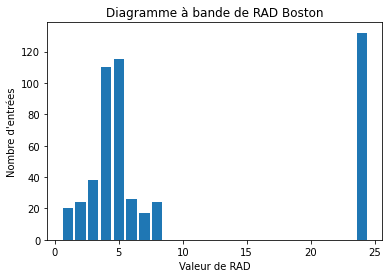

In [5]:
# Option implicite et rapide
# On appel directement la fonction bar de pyplot
# value_counts est utilisé pour déterminer les bandes du graphe
plt.bar(list(boston['RAD'].value_counts().index), 
        list(boston['RAD'].value_counts().values))
plt.title('Diagramme à bande de RAD Boston')
plt.xlabel('Valeur de RAD')
plt.ylabel("Nombre d'entrées")

[Text(0.5, 0, 'Valeur de RAD'), Text(0, 0.5, "Nombre d'entrées")]

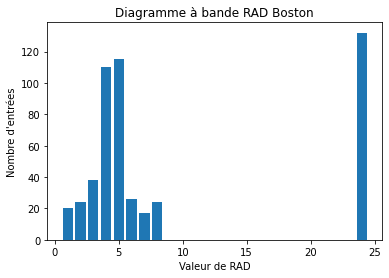

In [6]:
# Option plus complète et explicite
# On définit une figure et des axes à l'aide de la fonction subplots
fig, ax = plt.subplots()

# On utilise l'objet ax comme on utilisait plt dans l'exemple précédent
ax.bar(list(boston['RAD'].value_counts().index), 
       list(boston['RAD'].value_counts().values))
ax.set_title('Diagramme à bande RAD Boston')
ax.set(xlabel='Valeur de RAD', ylabel="Nombre d'entrées")

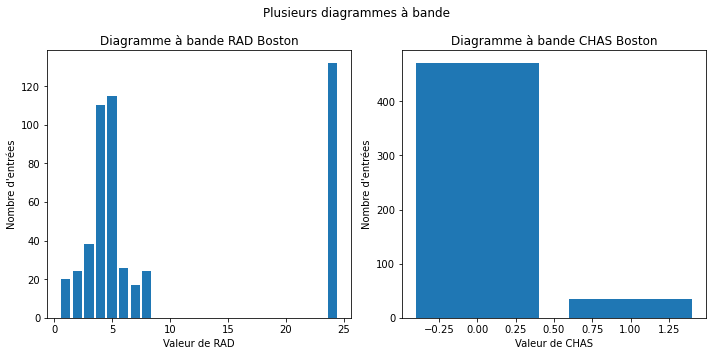

In [7]:
# Passer par les axes permet de générer plusieurs graphes sur la même figure
# Les premiers paramètres de subplots définissent une grille dans laquelle sont placés les graphes
# figsize permet de définir la taille des figures
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.bar(list(boston['RAD'].value_counts().index), 
       list(boston['RAD'].value_counts().values))
ax1.set_title('Diagramme à bande RAD Boston')
ax1.set(xlabel='Valeur de RAD', ylabel="Nombre d'entrées")

ax2.bar(list(boston['CHAS'].value_counts().index), 
       list(boston['CHAS'].value_counts().values))
ax2.set_title('Diagramme à bande CHAS Boston')
ax2.set(xlabel='Valeur de CHAS', ylabel="Nombre d'entrées")

# Notez qu'il est possible de donner un titre à l'ensemble des graphes
fig.suptitle('Plusieurs diagrammes à bande')

plt.tight_layout() # Pour qu'il n'y ait pas de superposition entre les figures

Text(0, 0.5, "Nombre d'entrées")

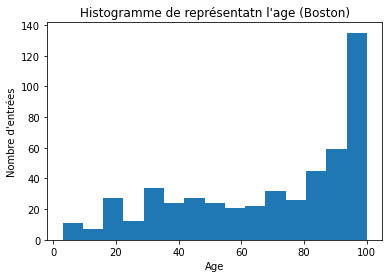

In [8]:
# histogramme (Équivalent pour les variables numériques avec beaucoup de valeurs uniques)
# L'histogramme fonctionne un peu différement de de diagramme à bande. 
# Il prend en paramètre l'ensemble des valeurs et un nombre de plages.
num_bins = 15
n, bins, patches = plt.hist(boston['AGE'], num_bins)
plt.title("Histogramme de représentatn l'age (Boston)")
plt.xlabel("Age")
plt.ylabel("Nombre d'entrées")

## Section 2: Visualisation avec *pandas*

*Pandas* offre des outils de visualisation en tant que méthodes des *dataframes*. Ces méthodes sont très utiles pour la visualisation de données. Elles permettent aussi de sauver beaucoup de temps par rapport à une implémentation à partir de 0 avec matplotlib. Consulter la [documentation de l'API de pandas](https://pandas.pydata.org/docs/reference/frame.html) pour plus de détails.

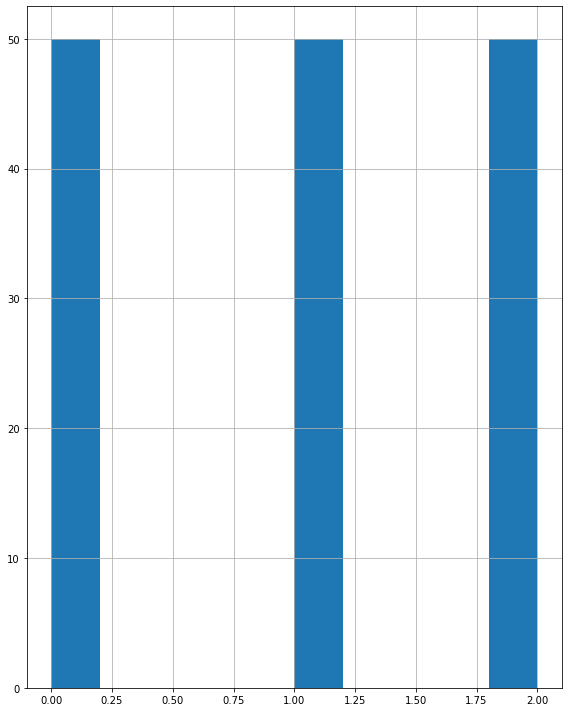

In [9]:
# Générer tous les histogrammes
hist_iris = iris['target'].hist(figsize=(8,10))
plt.tight_layout() # Notez l'utilisation de matplotlib comme dans la dernière section

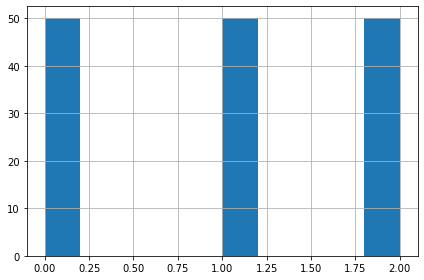

In [10]:
hist_iris = iris['target'].hist()
plt.tight_layout() 

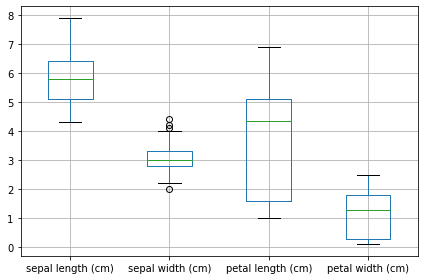

In [11]:
# Les boxplot peuvent aussi être un bon outils de visualisation qui relèvent quelques statistiques
box_iris = iris.drop('target', axis = 'columns').boxplot()
plt.tight_layout()

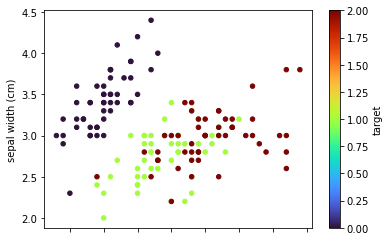

In [12]:
# Les nuages de points 2D permettent de mettre en relation deux variables et de visualiser la classe en même temps avec des couleurs
scatter_iris = iris.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', c='target', cmap='turbo')

<AxesSubplot:ylabel='Density'>

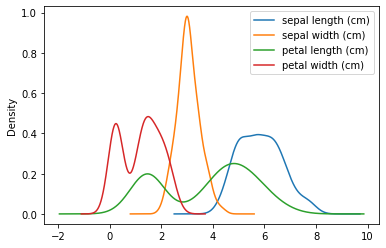

In [13]:
# Similaire aux histogrammes, mais lissés (estimation de la densité de probabilité). 
# Permet de les compararer sur la même échelle, un peu comme le boxplot
iris.drop('target', axis='columns').plot.kde()

## Section 3: Visualisation avec *seaborn*

Bien que ce qui démarque principalement *seaborn* de *matplotlib* est la partie esthétique de la visualisation, grâce à des thèmes inclus dans la librairie, cette librairie offre aussi des types de visualisation intéressants. Cette librairie est complémentaire à *pandas* au niveau de la visualisation. Pour plus d'information sur comment utiliser seaborn, consultez [les tutoriels de seaborn](https://seaborn.pydata.org/tutorial.html).

In [14]:
# Initialisation des paramètres de style de seaborn
sns.set()
#sns.set_palette('bright')
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

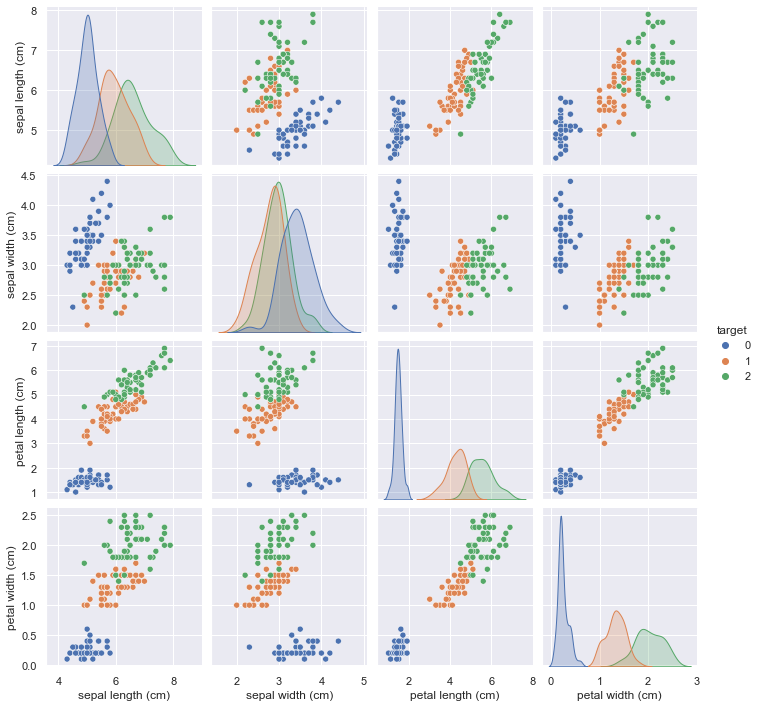

In [15]:
# Présente à la fois les histogrammes/densité de probabilité et les nuages de points
sns.pairplot(iris, hue="target", palette = 'deep')

<AxesSubplot:>

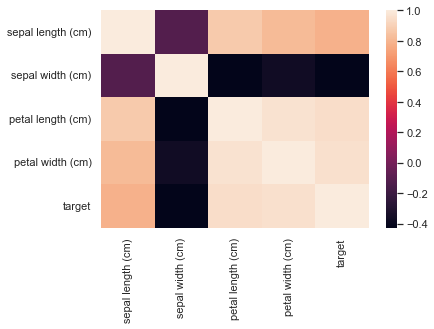

In [16]:
# Matrice de corrélation
# Plus il la valeur est loin de 0, plus la relation est forte entre les variables
sns.heatmap(iris.corr())

<AxesSubplot:>

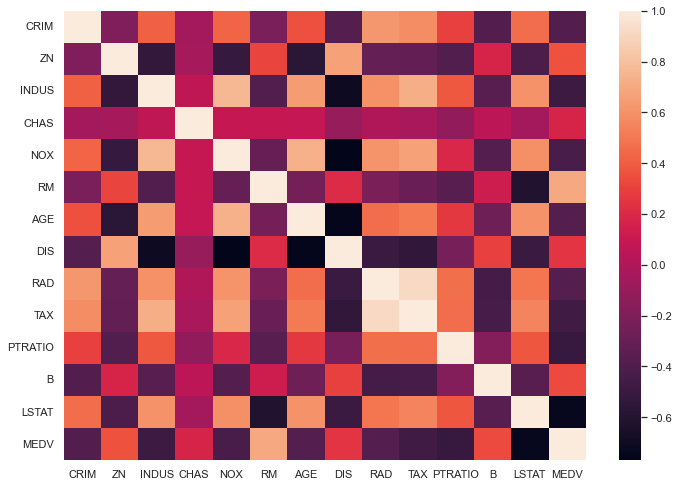

In [27]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(boston.corr())


## Section 4: Questions

### Manipulation 1 (2 points)

Représenter le diagramme à bande et l'histogramme pour une variable à valeur numérique et pour une variable catégorique. (2 graphes par variables -> 4 graphes au total)

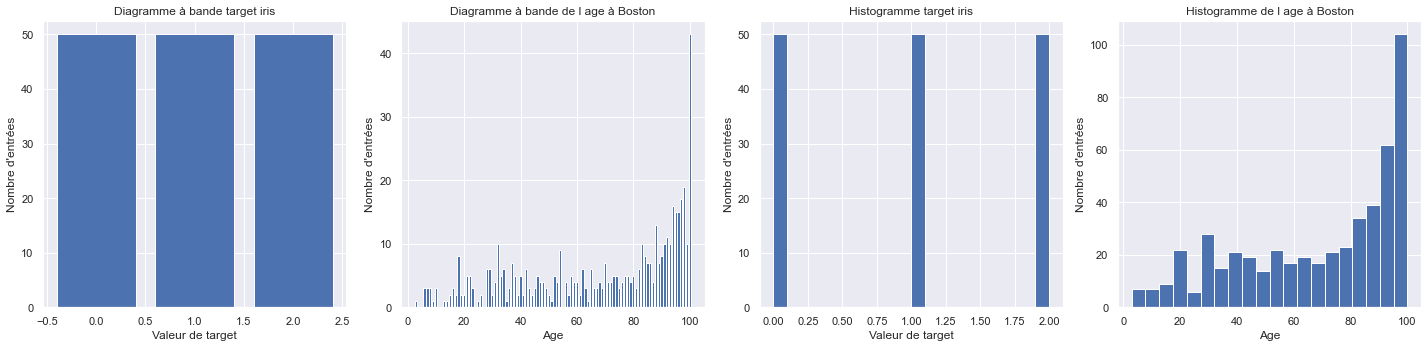

In [57]:
fig, (ax3, ax4, ax5, ax6) = plt.subplots(1,4, figsize=(20,5))

ax3.bar(list(iris['target'].value_counts().index), 
        list(iris['target'].value_counts().values))
ax3.set_title('Diagramme à bande target iris')
ax3.set(xlabel='Valeur de target', ylabel="Nombre d'entrées")

ax4.bar(list(boston['AGE'].value_counts().index), 
        list(boston['AGE'].value_counts().values))
ax4.set_title('Diagramme à bande de l age à Boston')
ax4.set(xlabel='Age', ylabel="Nombre d'entrées")

num_bins = 20
n, bins, patches = ax5.hist(iris['target'], num_bins)
ax5.set_title('Histogramme target iris')
ax5.set(xlabel='Valeur de target', ylabel="Nombre d'entrées")

num_bins = 20
n, bins, patches = ax6.hist(boston['AGE'], num_bins)
ax6.set_title('Histogramme de l age à Boston')
ax6.set(xlabel='Age', ylabel="Nombre d'entrées")

plt.tight_layout()

### Question 1  (2 points)

Quelle est la différence entre un diagramme à bande et un histogramme? Veuillez intégrer dans quel cas un est préférable à l'autre dans les éléments de réponse.

L'histogramme recouvre un intervalle, il compte le nombre d'occurences dans cet intervalle, le diagramme a bande donne le nombre d'occurence pour une valeure précise. Les diagrammes à bande représentent les données catégoriques, tandis que les histogrammes représentent des données continues.

### Question 2 (1 point)

Générer les histogramme est une chose, toutefois, il faut savoir comment les interpréter. Quels sont les informations que l'on peut retirer d'un histogramme? Relever au moins 2 éléments.

-la loi que suit la répartition 
-le nombre d'entrées dans un intervalle 

### Manipulation 2 (2 points)

Générez le KDE et l'histogramme pour une variable numérique se votre choix. Représentez les graphes côte à côte.

<AxesSubplot:>

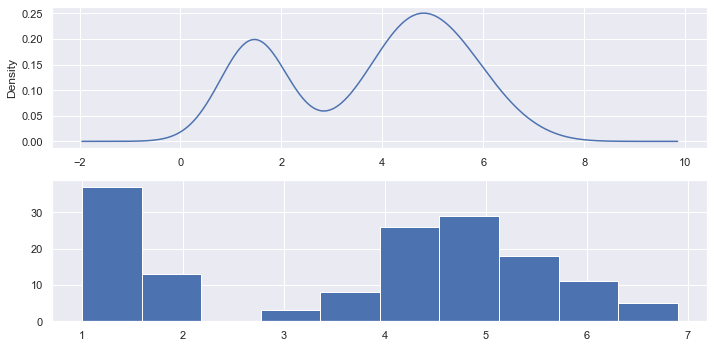

In [19]:
# Faire les manipulations 

fig, (ax3, ax4)= plt.subplots(2, 1, figsize=(10,5))
ax3 = iris['petal length (cm)'].hist()
plt.subplot(211)
ax4 = iris['petal length (cm)'].plot.kde()
plt.tight_layout()
plt.subplot(212)

### Question 3 (1 point)

Est-ce que les informations que l'on retrouve dans le KDE (Kernel density estimation ou estimation par noyau) est la même que dans l'histogramme. Si oui, pourquoi. Si non, donner un exemple.

Les informations sont similaires oui. Cependant le KDE est continu donc c'est plus facile a analyser.

### Manipluation 3 (2 points)

Représenter le KDE de la colonne 'petal length (cm)' pour chaque classe de la colonne 'target' en utilisant pandas. Vous devriez retrouver le même graphe dans le pair_plot de seaborn.

<AxesSubplot:ylabel='Density'>

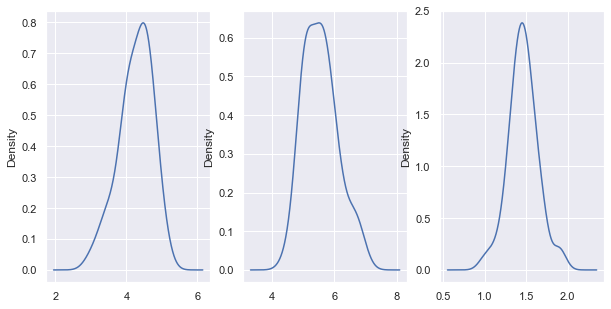

In [20]:
# Faire les manipulations ici
con_targ_0 = iris['target'] == 0 
con_targ_1 = iris['target'] == 1
con_targ_2 = iris['target'] == 2
df_0 = iris[con_targ_0]
df_1 = iris[con_targ_1]
df_2 = iris[con_targ_2]


fig, (ax0, ax1, ax2)= plt.subplots(1, 3, figsize=(10,5))
ax0 = df_0['petal length (cm)'].plot.kde()
plt.subplot(131)
ax1 = df_1['petal length (cm)'].plot.kde()
plt.subplot(132)
ax2 = df_2['petal length (cm)'].plot.kde()
plt.subplot(133)

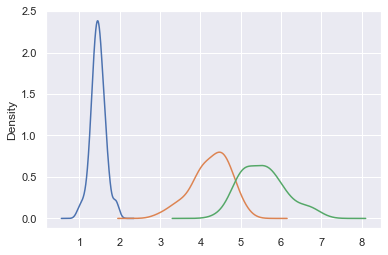

In [21]:
con_targ_0 = iris['target'] == 0 
con_targ_1 = iris['target'] == 1
con_targ_2 = iris['target'] == 2
df_0 = iris[con_targ_0]
df_1 = iris[con_targ_1]
df_2 = iris[con_targ_2]

y = (10,)
ax0 = df_0['petal length (cm)'].plot.kde()

ax1 = df_1['petal length (cm)'].plot.kde()

ax2 = df_2['petal length (cm)'].plot.kde()


### Question 4 (1 point)

À partir du pair_plot effectué avec le dataset iris, pensez-vous qu'il sera possible d'effectuer de bonne prédiction sur la colonne 'target'? Pouquoi? Est-ce que certaines classes seront plus facile à prédire que d'autres?

En première approximation on peut distinguer 2 des 3 classes. C'est à dire séparer les données qui ont un petal lenght autour de 1.5 cm de celles qui on une valeure comprises entre 3.5 et 7, pour les valeurs comprises entre 3.5 et 7 on peut par défaut les séparer entre celles qui ont une valeure inférieure et supérieure à 4.8 (endroit ou les deux KDE se recontrent) cependant ce n'est pas l'approximation la plus précise.

### Manipulation 4 (1 point)

Effectuer un pair_plot pour le dataset boston.

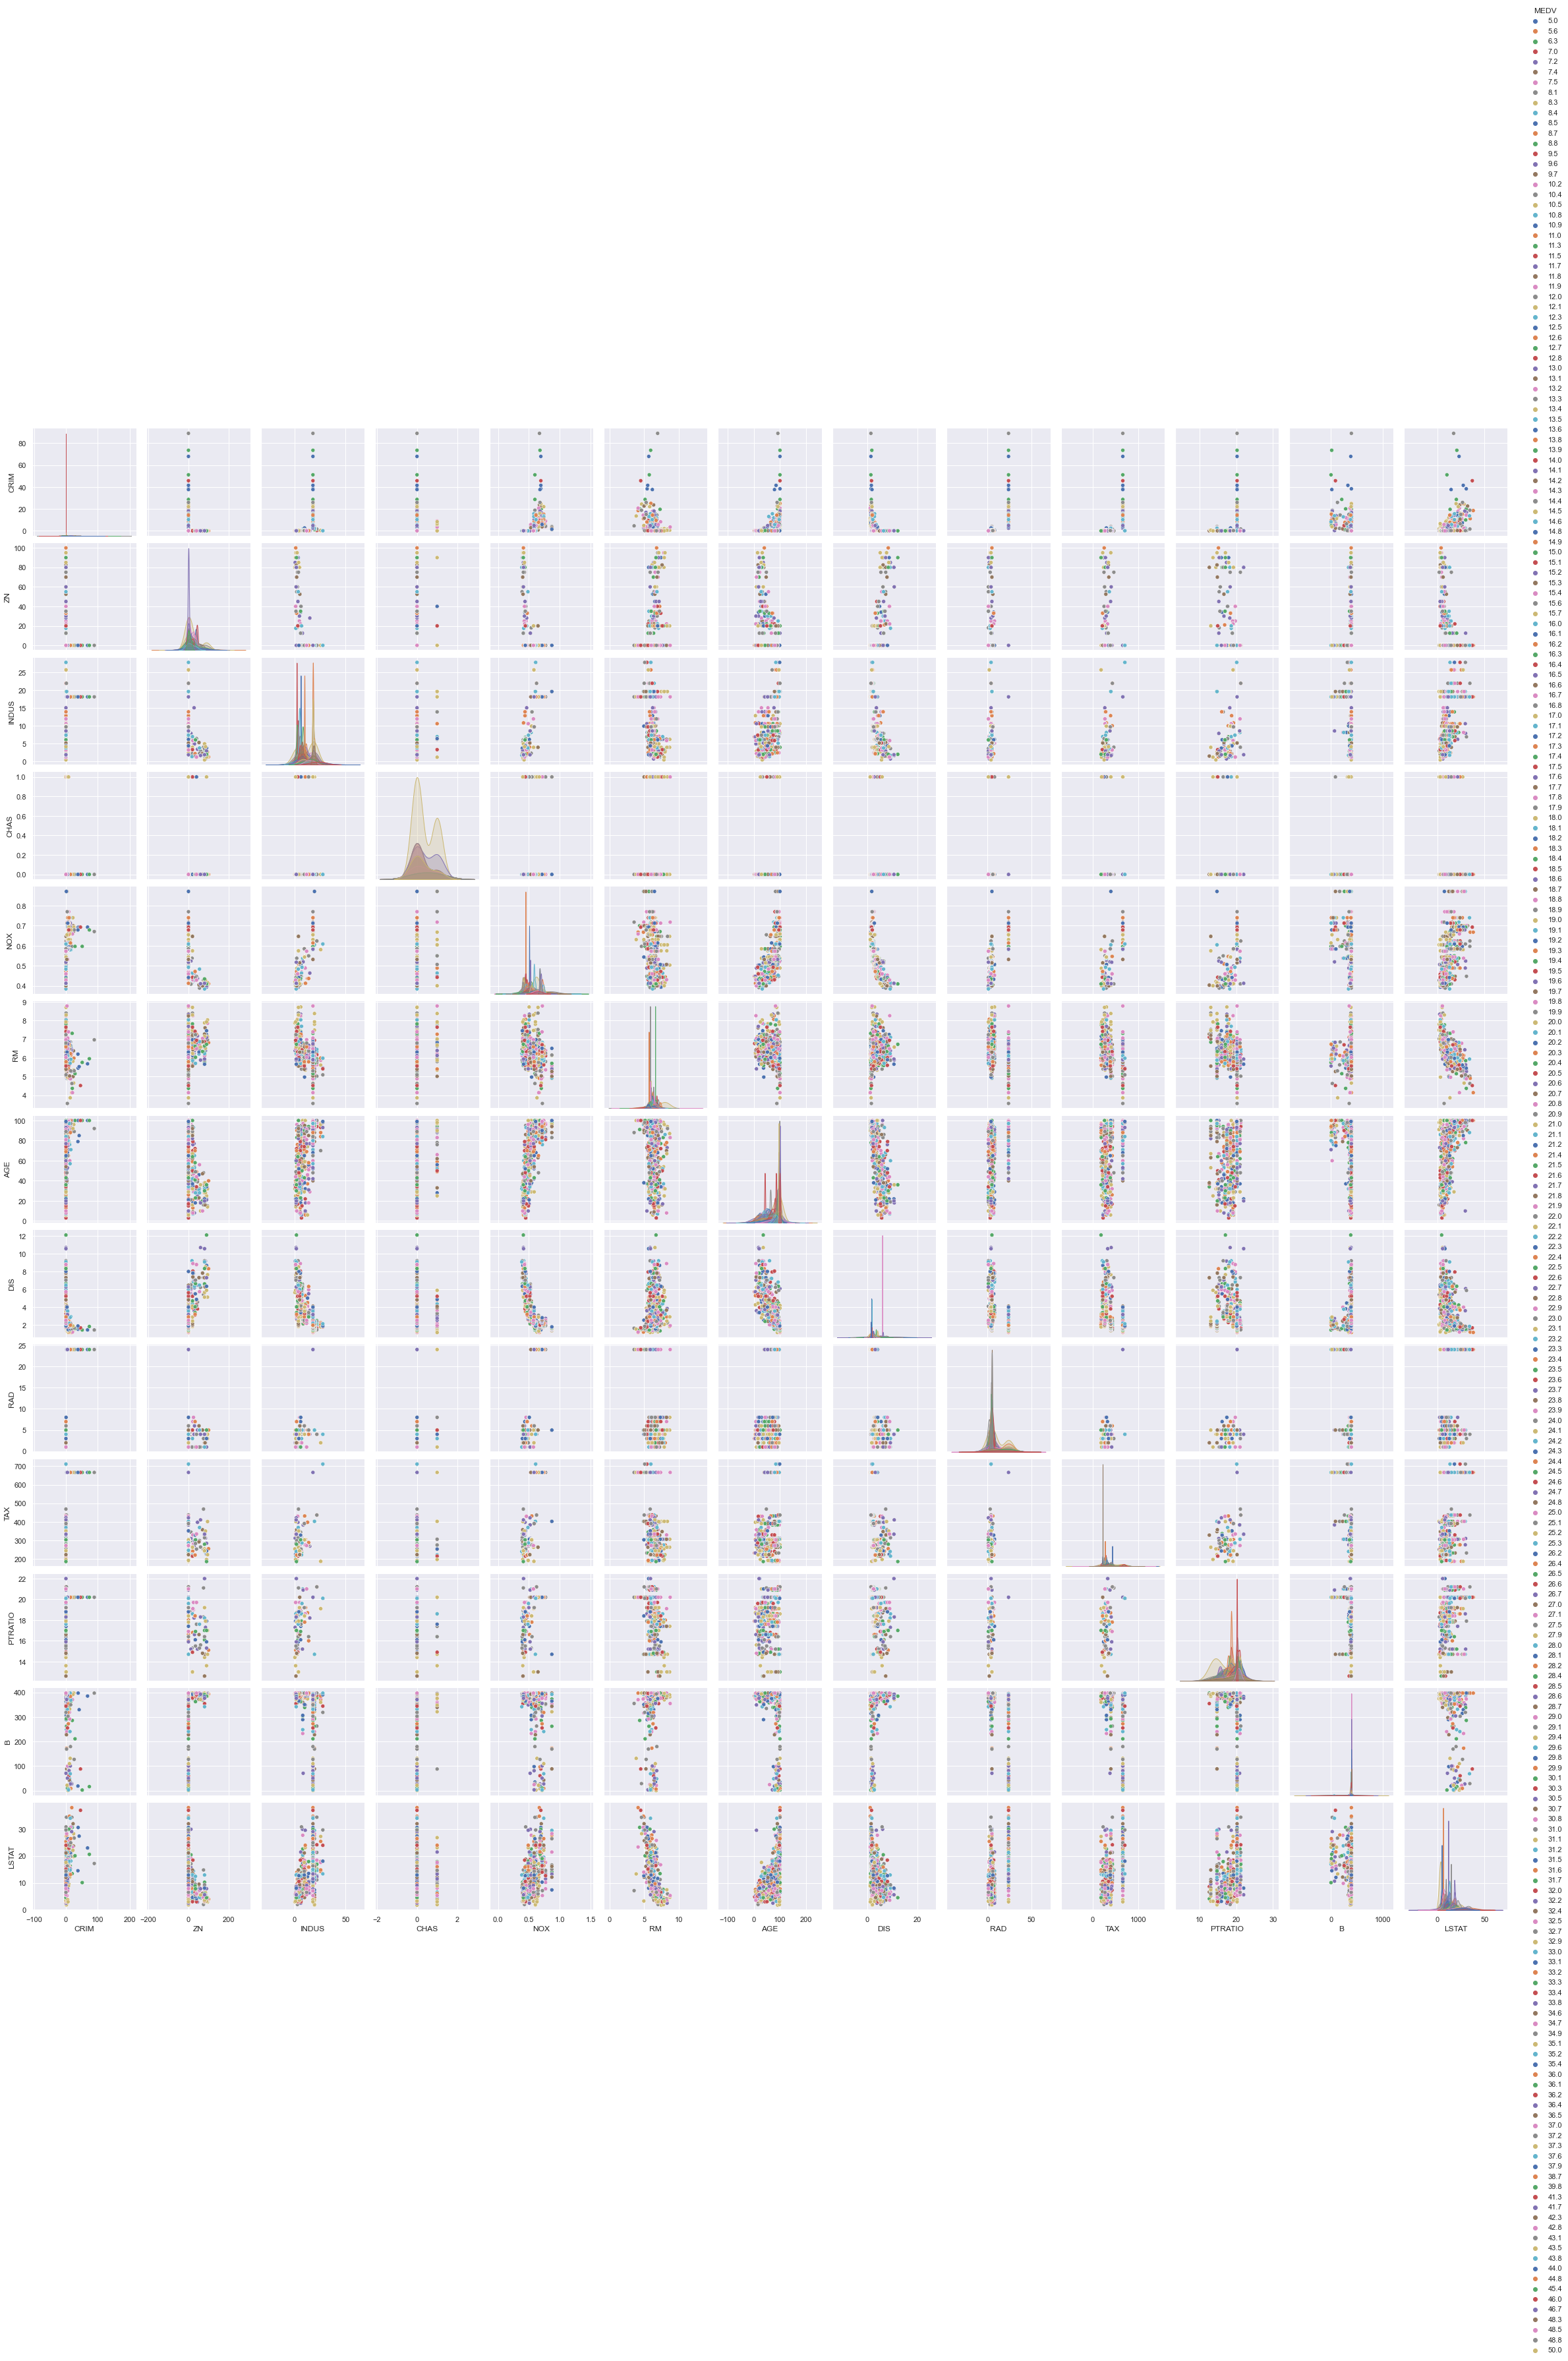

In [29]:
# Faire les manipulations ici
sns.pairplot(boston, hue='MEDV' ,palette = 'deep')

### Question 5 (2 points)

Considérant que l'on veut prédire la variable MEDV, quelles variables semblent les plus utiles? Pourquoi?

PTRATIO, LSTAT, RM, car les valeures de la corrélation sont les plus éloignées de 0.

### Question 6 (1 point)

Quelles seront les variables les plus pertinentes pour prédire la variable 'target' pour le dataset iris selon la matrice de corrélation? Classer en ordre d'importance les variables

1. Petal width 
2. Petal length
3. Sepal lenght
4. Sepal width

### Question 7 (1 point Bonus)

Selon vous, est-ce que les graphes représentés durant ce laboratoire sont suffisants pour établir si une variable est pertinente ou non pour l'apprentissage machine? Argumenter sur quelque lignes.

Pour un modèle linéaire classique les graphiques représentés dans ce laboratoire nous indiquent les classes les plus utiles à conserver. On implémente une regression linéaire : 

In [50]:
iris=iris.sample(frac=1, ignore_index=True)
X = iris.iloc[:,0:2]

y = iris.iloc[:,-1]

X_train,X_val = X.iloc[0:110,:],X.iloc[110:150,:]
y_train,y_val = y.iloc[0:110],y.iloc[110:150]

import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_val,y_val)

0.9179792799176568

et obtient une accuracy proche de 0.8 avec les deux classes que nous considérons les plus représentatives. En utilisant toutes les classes on obtient : 

In [60]:
iris=iris.sample(frac=1, ignore_index=True)
X = iris.iloc[:,0:4]

y = iris.iloc[:,-1]

X_train,X_val = X.iloc[0:110,:],X.iloc[110:150,:]
y_train,y_val = y.iloc[0:110],y.iloc[110:150]

import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_val,y_val)

0.9107047633172259

une accuracy proche de 0.9, ce qui n'est pas une amélioration significative en considérant qu'on a doublé le volume de données associées à chaque target. 